In [34]:
# Importing Required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
# Reading Data

data = pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [36]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### Exploratory Data Analysis

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [38]:
data.describe() 

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [39]:
# Checking for Duplicates

data[data.duplicated()]

,YearsExperience,Salary


In [40]:
# No Duplicates

data[data.duplicated()].shape[0]

0

<Axes: >

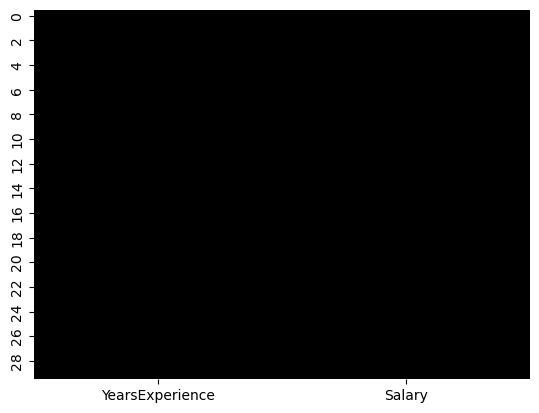

In [41]:
# Checking for missing values & imputation through visualisation

import seaborn as sns
cols = data.columns 
colours = ['black', 'yellow'] 
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours), cbar = False)

# No Null Values

<Axes: >

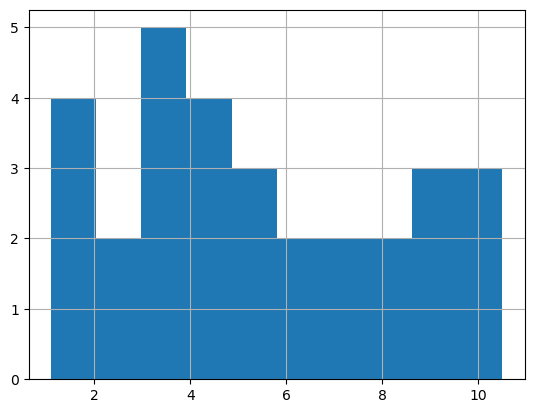

In [42]:
# Checking for Outliers

data["YearsExperience"].hist()

<Axes: >

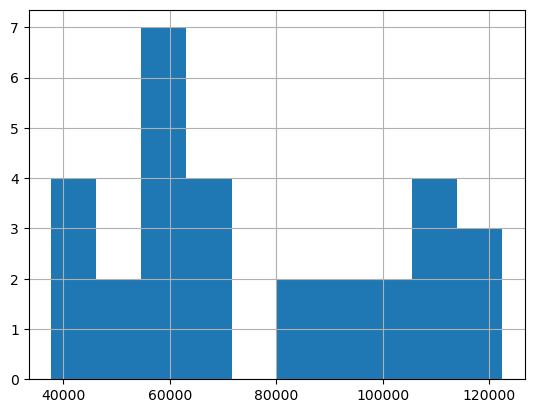

In [43]:
data["Salary"].hist()

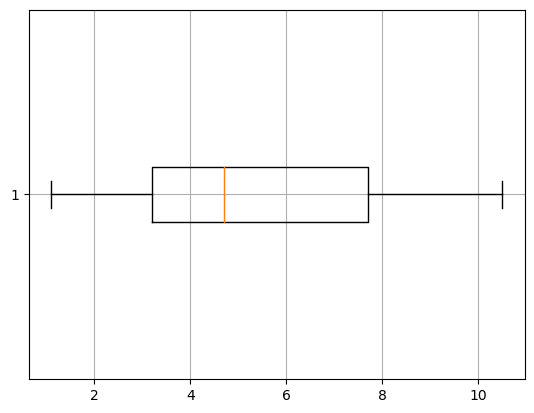

In [44]:
plt.grid()
box = plt.boxplot(data["YearsExperience"],vert=False)

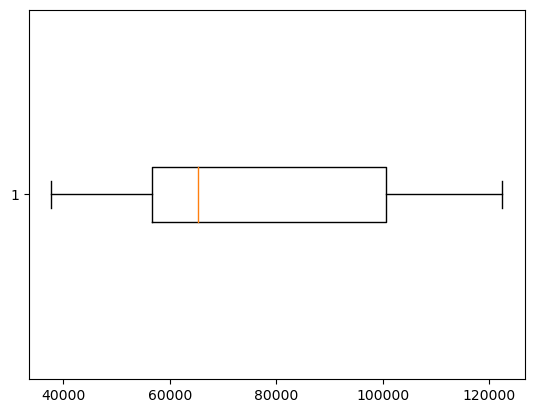

In [45]:
box = plt.boxplot(data["Salary"],vert=False)

# No Outliers

### Simple Linear Regression Model

In [46]:
data["YearsExperience"].corr(data["Salary"])

0.9782416184887599

In [47]:
data[["YearsExperience","Salary"]].corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


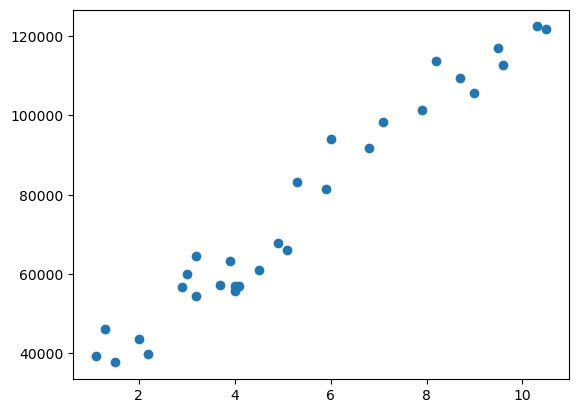

In [48]:
plt.scatter(data["YearsExperience"], data["Salary"])

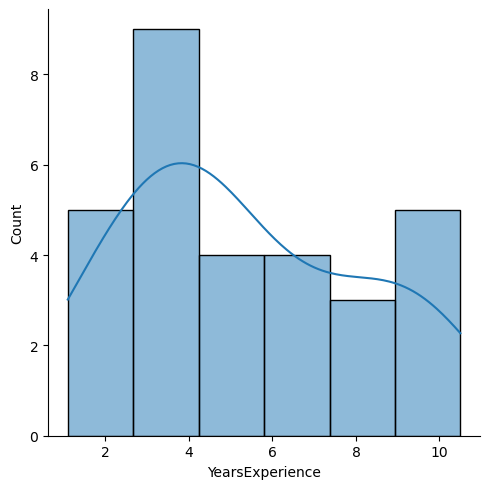

In [49]:
sns.displot(data["YearsExperience"],kde=True) 

C:\Users\vaibh\AppData\Local\Temp\ipykernel_19024\1485985696.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Salary"], kde = True)


<Axes: xlabel='Salary', ylabel='Density'>

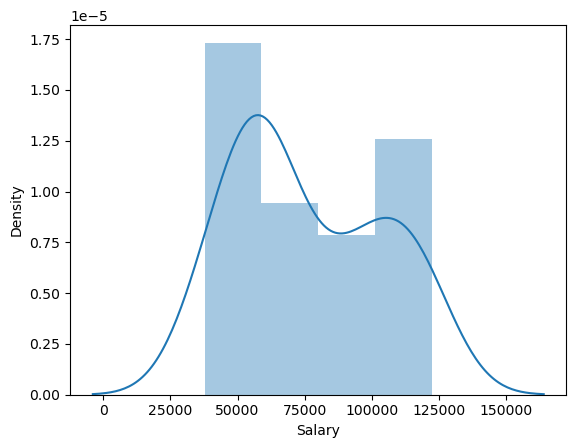

In [50]:
sns.distplot(data["Salary"], kde = True)

In [51]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience",data = data).fit()

In [52]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 27 Sep 2023   Prob (F-statistic):           1.14e-20
Time:                        21:45:17   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

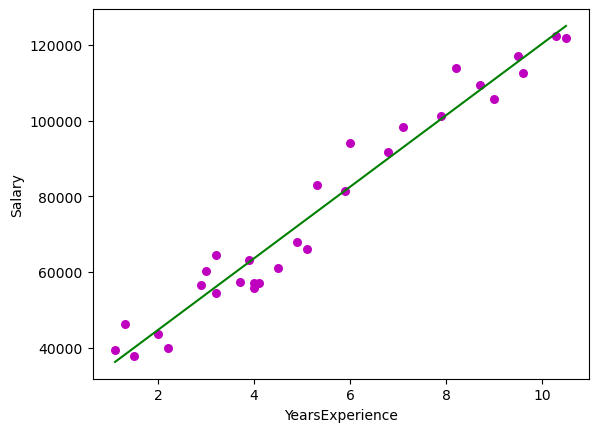

In [54]:
x = data["YearsExperience"].values
y = data["Salary"].values
plt.scatter(x, y, color = "m", marker = "o", s = 30)
b0 = 25792.200199
b1 =9449.9623

# predicted response vector
y_hat = b0 + b1*x
 
# plotting the regression line
plt.plot(x, y_hat, color = "g")
  
# putting labels
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

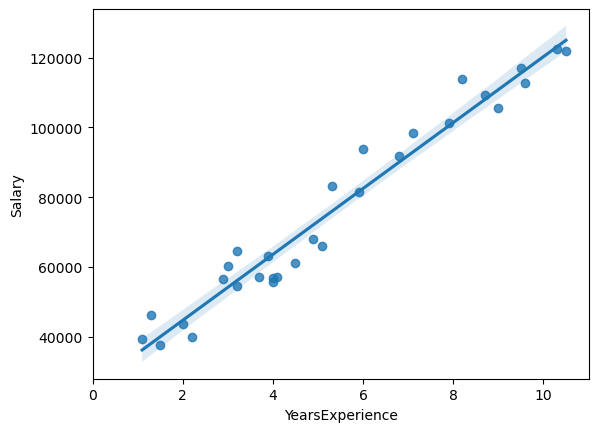

In [55]:
sns.regplot(x="YearsExperience", y="Salary", data=data)
plt.xlim([0,max(x)+0.5])
plt.show()

In [56]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

### Prediction

In [57]:
pred = model.predict(data["YearsExperience"])   # For given x value, these are y_hat values
pred

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [58]:
data["Y_hat"] = pred

In [59]:
data

,YearsExperience,Salary,Y_hat
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


In [60]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [61]:
mean_absolute_percentage_error(data["YearsExperience"],data["Y_hat"])

16485.71395750862

In [62]:
# Root Mean Squared Error

np.sqrt(mean_squared_error(data["Salary"],data["Y_hat"]))

5592.043608760662

In [63]:
# Mean Squared Error

mean_squared_error(data["Salary"],pred)

31270951.72228097

In [66]:
# Predicting for new values

newdata=pd.Series([1.5,2.7,5.1,6,3.9,8.2,10])
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])
data_pred

,YearsExperience
0,1.5
1,2.7
2,5.1
3,6.0
4,3.9
5,8.2
6,10.0


In [67]:
model.predict(data_pred)

0     39967.143681
1     51307.098467
2     73987.008038
3     82491.974127
4     62647.053252
5    103281.891235
6    120291.823413
dtype: float64